<a href="https://colab.research.google.com/github/glwat/Durham_Masters/blob/main/Distribution_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load File Using Pandas

In [ ]:
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/Masters_Colab_Data/Rockfall_Data_2021_Clean.xlsx'

# Load the Excel file into a Pandas DataFrame
try:
    df = pd.read_excel(file_path)
    print(f"Successfully loaded {file_path}.")
    print(df.info())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the path and filename.")
except Exception as e:
    print(f"An error occurred while loading the Excel file: {e}")

Successfully loaded /content/drive/MyDrive/Masters_Colab_Data/Rockfall_Data_2021_Clean.xlsx.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11407 entries, 0 to 11406
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DateTime              11407 non-null  datetime64[ns]
 1   ID                    11407 non-null  int64         
 2   Rockfall_Volume       11407 non-null  float64       
 3   Volume_Error          4105 non-null   float64       
 4   Rockfall_Event_Count  11407 non-null  int64         
 5   Total_Rainfall        11406 non-null  float64       
 6   Air_Temp              11407 non-null  float64       
 7   Relative_Humidity     11407 non-null  float64       
 8   Hourly_Rainfall       11105 non-null  float64       
 9   Time_Sin              11407 non-null  float64       
 10  Time_Cos              11407 non-null  float64       
 11  Date_Sin              11407 non-null  f

### Aggregate the Dataset

In [ ]:
aggregation_rules = {
    'Rockfall_Volume': 'sum',
    'Volume_Error': 'sum',
    'Rockfall_Event_Count': 'sum',
    'Total_Rainfall': 'mean',
    'Air_Temp': 'mean',
    'Relative_Humidity': 'mean',
    'Hourly_Rainfall': 'mean',
    'Time_Sin': 'mean',
    'Time_Cos': 'mean',
    'Date_Sin': 'mean',
    'Date_Cos': 'mean'
}

df_aggregated = df.groupby('DateTime').agg(aggregation_rules).reset_index()

print(f"Original DataFrame (df):")
print(f"  Total observations: {len(df)}")
print(f"  Unique DateTime values: {df['DateTime'].nunique()}")
print(f"\nAggregated DataFrame (df_aggregated):")
print(f"  Total observations: {len(df_aggregated)}")

Original DataFrame (df):
  Total observations: 11407
  Unique DateTime values: 8377

Aggregated DataFrame (df_aggregated):
  Total observations: 8377


Exploring Patterns

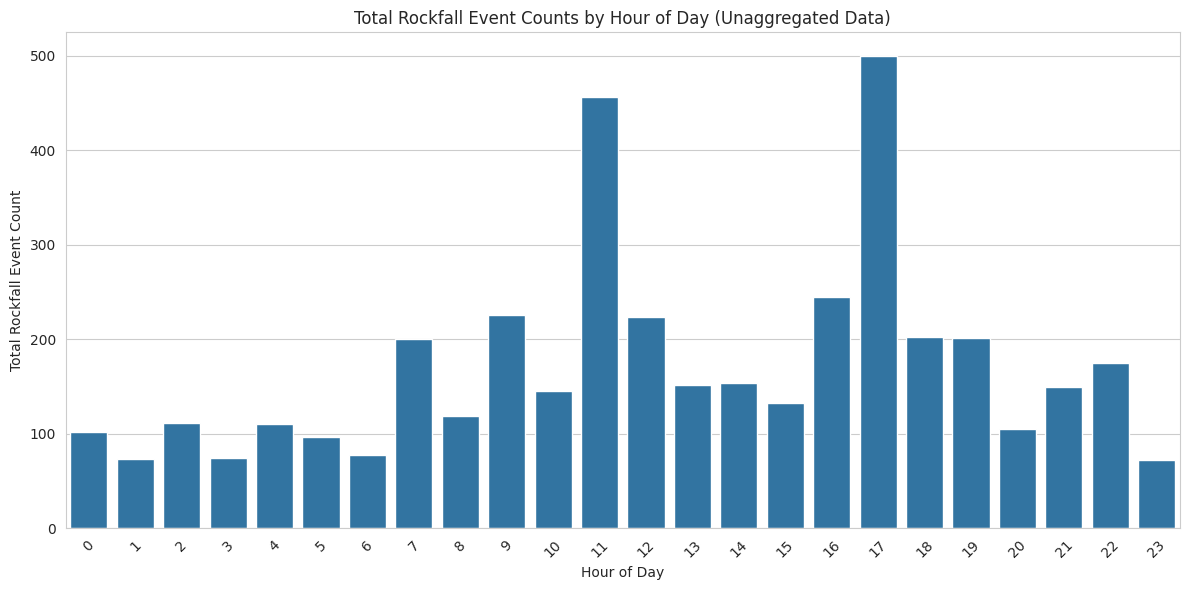

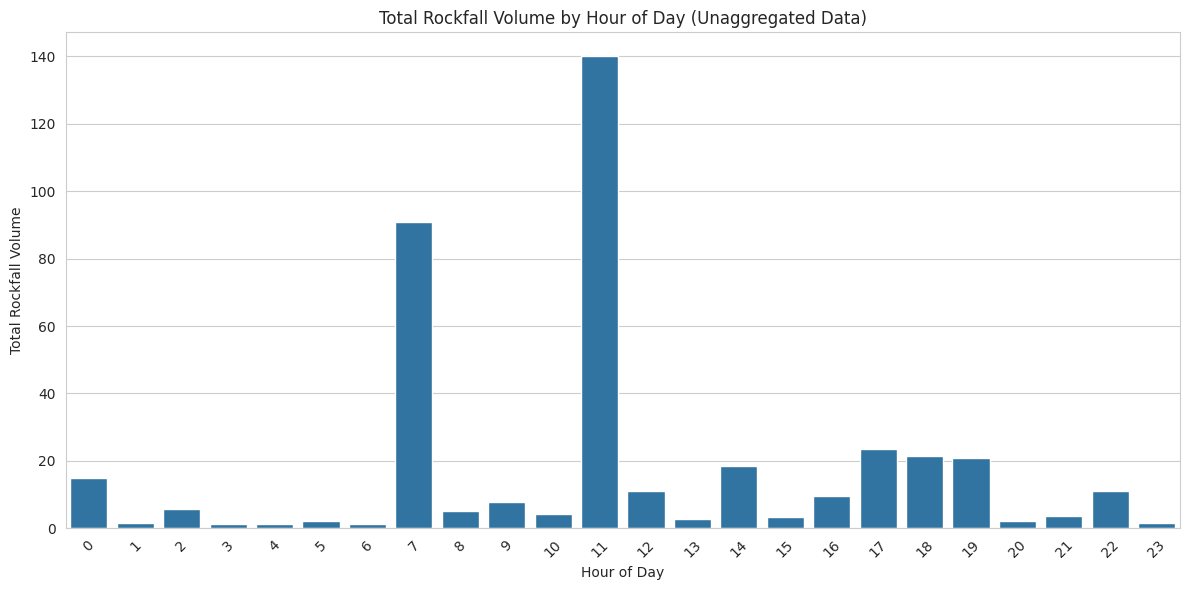

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Extract the hour from the 'DateTime' column
df['Hour_of_Day'] = df['DateTime'].dt.hour

# Group by hour and sum 'Rockfall_Event_Count'
hourly_rockfall_counts = df.groupby('Hour_of_Day')['Rockfall_Event_Count'].sum().reset_index()

# Create the bar plot for event counts
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour_of_Day', y='Rockfall_Event_Count', data=hourly_rockfall_counts)
plt.title('Total Rockfall Event Counts by Hour of Day (Unaggregated Data)')
plt.xlabel('Hour of Day')
plt.ylabel('Total Rockfall Event Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Group by hour and sum 'Rockfall_Volume'
hourly_rockfall_volume = df.groupby('Hour_of_Day')['Rockfall_Volume'].sum().reset_index()

# Create the bar plot for volume
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour_of_Day', y='Rockfall_Volume', data=hourly_rockfall_volume)
plt.title('Total Rockfall Volume by Hour of Day (Unaggregated Data)')
plt.xlabel('Hour of Day')
plt.ylabel('Total Rockfall Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

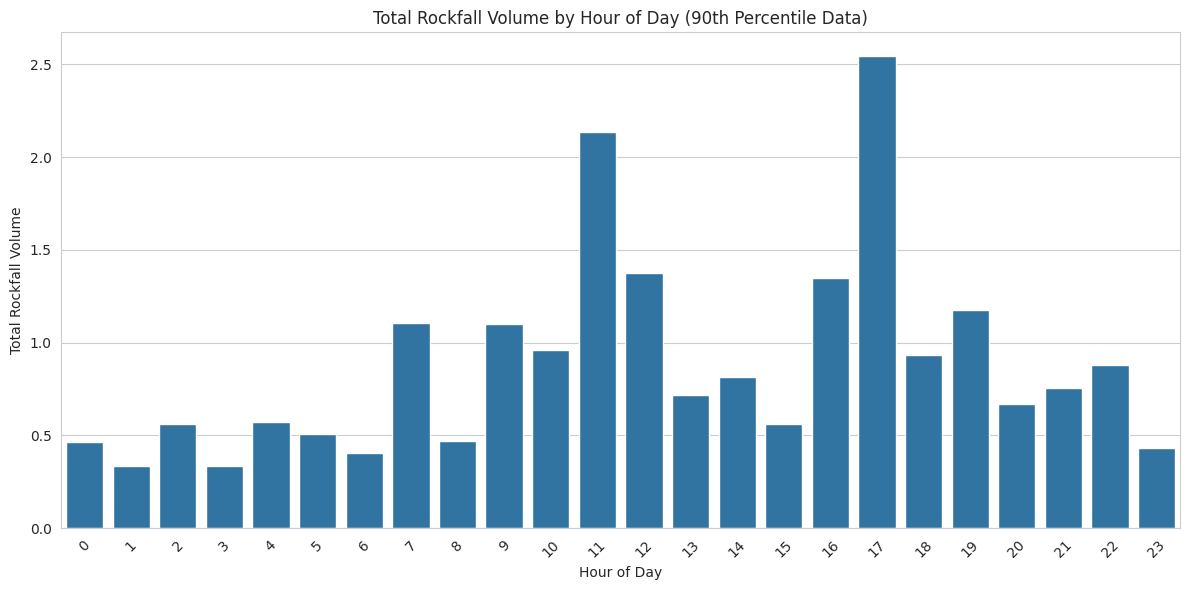

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

# Calculate the 90th percentile of 'Rockfall_Volume' from the original df
percentile_90 = df['Rockfall_Volume'].quantile(0.90)

# Filter the DataFrame to include only volumes within the 90th percentile
df_90th_percentile = df[df['Rockfall_Volume'] <= percentile_90].copy()

# Ensure 'Hour_of_Day' is extracted for the filtered DataFrame
df_90th_percentile['Hour_of_Day'] = df_90th_percentile['DateTime'].dt.hour

# Group by hour and sum 'Rockfall_Volume' for the 90th percentile data
hourly_rockfall_volume_90th = df_90th_percentile.groupby('Hour_of_Day')['Rockfall_Volume'].sum().reset_index()

# Create the bar plot for Rockfall_Volume within the 90th percentile
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour_of_Day', y='Rockfall_Volume', data=hourly_rockfall_volume_90th)
plt.title('Total Rockfall Volume by Hour of Day (90th Percentile Data)')
plt.xlabel('Hour of Day')
plt.ylabel('Total Rockfall Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

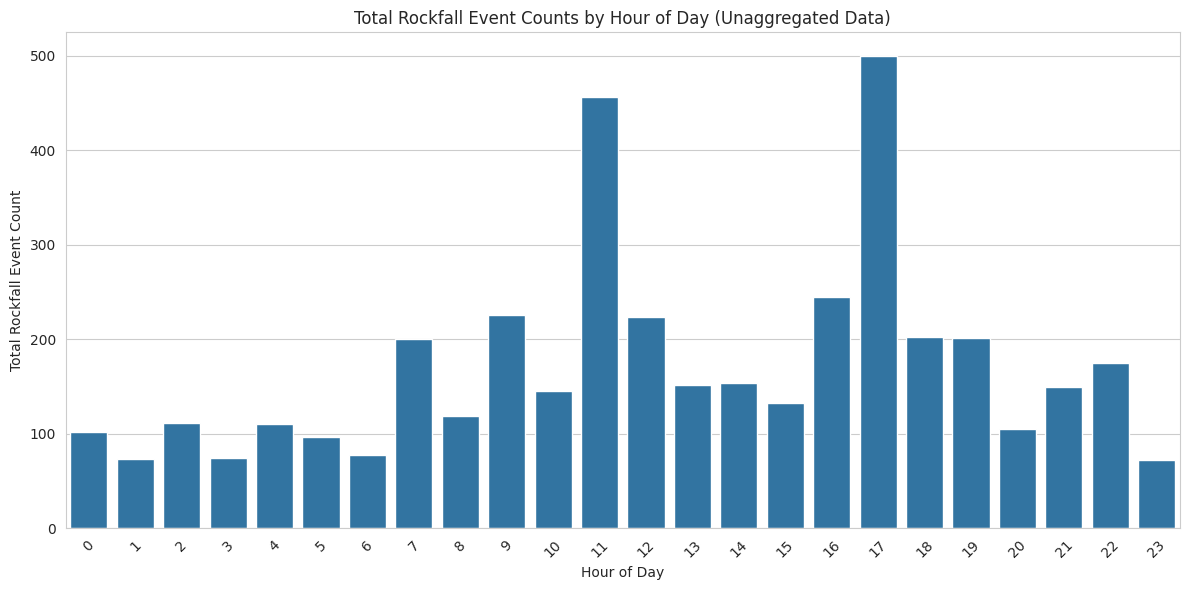

Experimentation

In [ ]:
import numpy as np

# Create log_Rockfall_Event_Count
df_aggregated['log_Rockfall_Event_Count'] = np.log1p(df_aggregated['Rockfall_Event_Count'])

# Create log_Rockfall_Volume
df_aggregated['log_Rockfall_Volume'] = np.log1p(df_aggregated['Rockfall_Volume'])

print("New variables 'log_Rockfall_Event_Count' and 'log_Rockfall_Volume' created.")

New variables 'log_Rockfall_Event_Count' and 'log_Rockfall_Volume' created.


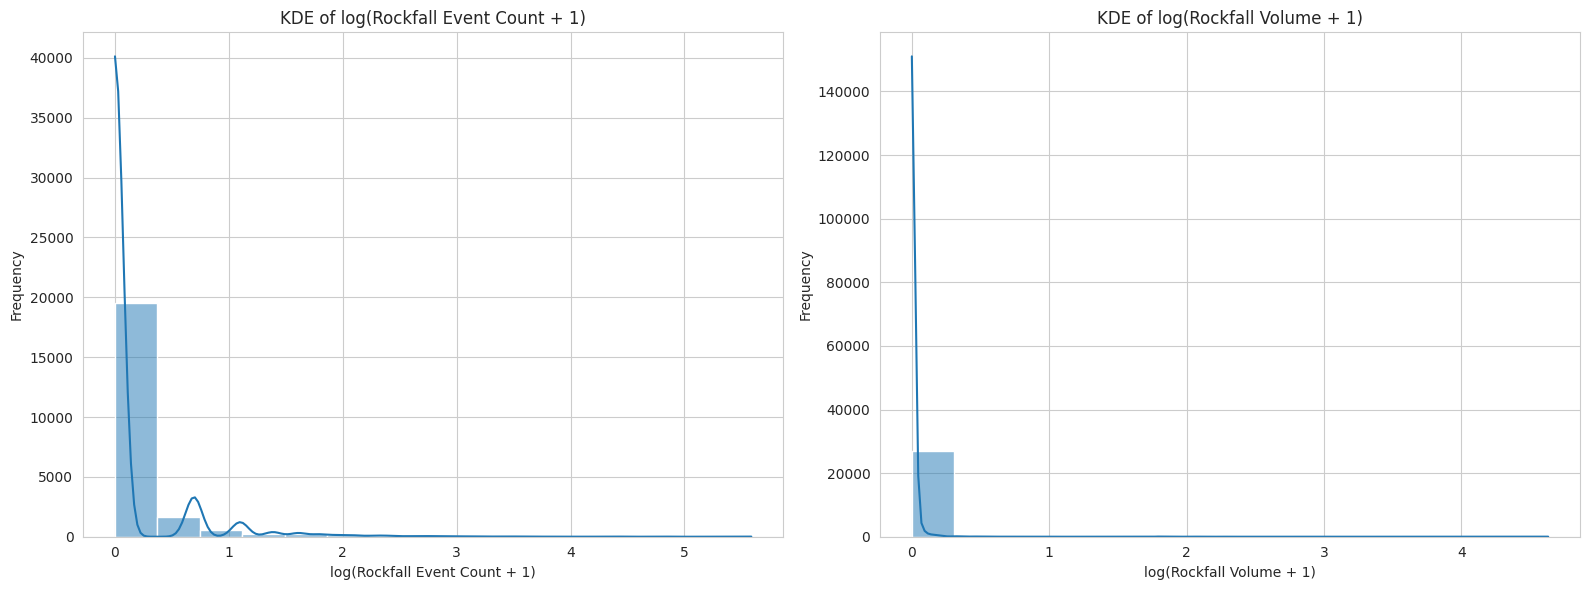

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the KDE for log_Rockfall_Event_Count
sns.histplot(df_aggregated['log_Rockfall_Event_Count'], kde=True, ax=axes[0], stat='frequency')
axes[0].set_title('KDE of log(Rockfall Event Count + 1)')
axes[0].set_xlabel('log(Rockfall Event Count + 1)')
axes[0].set_ylabel('Frequency')
axes[0].set_ylim(bottom=0) # Set y-axis to start from 0

# Plot the KDE for log_Rockfall_Volume
sns.histplot(df_aggregated['log_Rockfall_Volume'], kde=True, ax=axes[1], stat='frequency')
axes[1].set_title('KDE of log(Rockfall Volume + 1)')
axes[1].set_xlabel('log(Rockfall Volume + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_ylim(bottom=0) # Set y-axis to start from 0

plt.tight_layout()
plt.show()

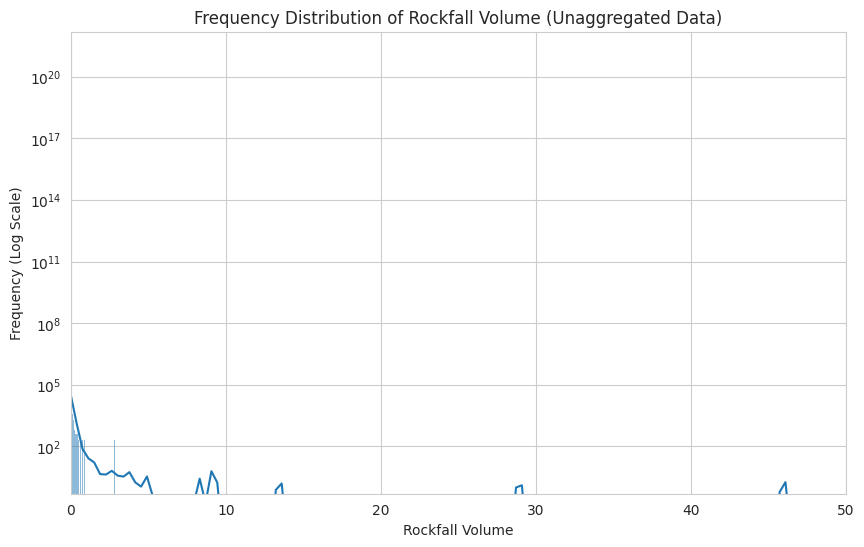

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Plot the histogram to get the counts, but don't show it yet
# We use the 'hist' function from matplotlib for direct count access
hist_counts, bin_edges, _ = plt.hist(df['Rockfall_Volume'], bins=np.arange(0, 1 + 0.005, 0.005), alpha=0) # alpha=0 makes it invisible

# Find the smallest positive frequency
min_positive_freq = hist_counts[hist_counts > 0].min()

# Re-create the histplot with KDE
sns.histplot(df['Rockfall_Volume'], kde=True, stat='frequency', binwidth=0.005)

plt.title('Frequency Distribution of Rockfall Volume (Unaggregated Data)')
plt.xlabel('Rockfall Volume')
plt.ylabel('Frequency (Log Scale)')
plt.xlim(0, 50) # Scale x-axis between 0 and 1
plt.yscale('log') # Set y-axis to logarithmic scale

# Set y-axis limits using the smallest positive frequency
# We'll use a small value below min_positive_freq to ensure it's visible, but not exactly 0
plt.ylim(min_positive_freq * 0.5, None)

plt.show()

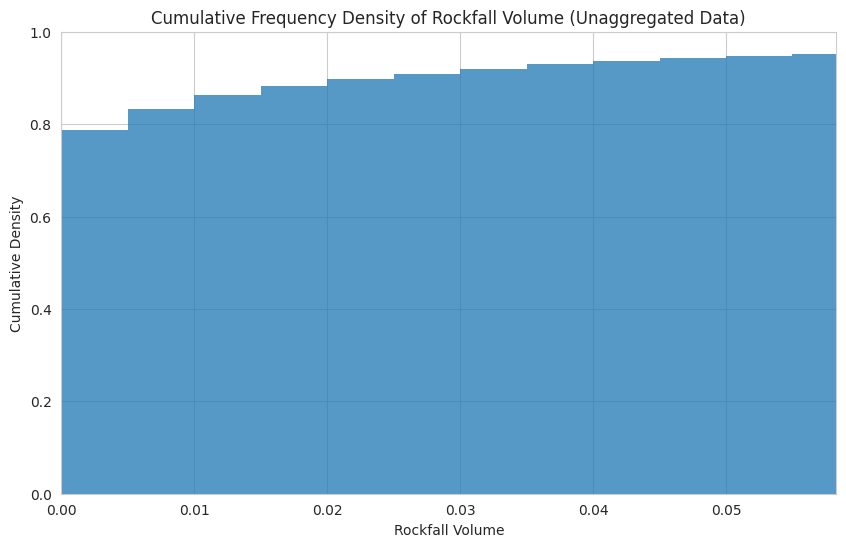

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(df['Rockfall_Volume'], kde=False, cumulative=True, stat='density', binwidth=0.005)

# Calculate the 95th percentile of 'Rockfall_Volume'
percentile_95 = df['Rockfall_Volume'].quantile(0.95)

plt.title('Cumulative Frequency Density of Rockfall Volume (Unaggregated Data)')
plt.xlabel('Rockfall Volume')
plt.ylabel('Cumulative Density')
plt.xlim(0, percentile_95) # Scale x-axis between 0 and 95th percentile
plt.ylim(0, 1) # Cumulative density typically goes from 0 to 1
plt.show()

New DataFrame with log-transformed variables:


,Log_Rockfall_Volume_Bin_Midpoint,Log_Cumulative_Density
0,-6.684612,-0.349301
1,-5.585999,-0.240007
2,-5.075174,-0.206258
3,-4.738702,-0.182514
4,-4.487387,-0.165923


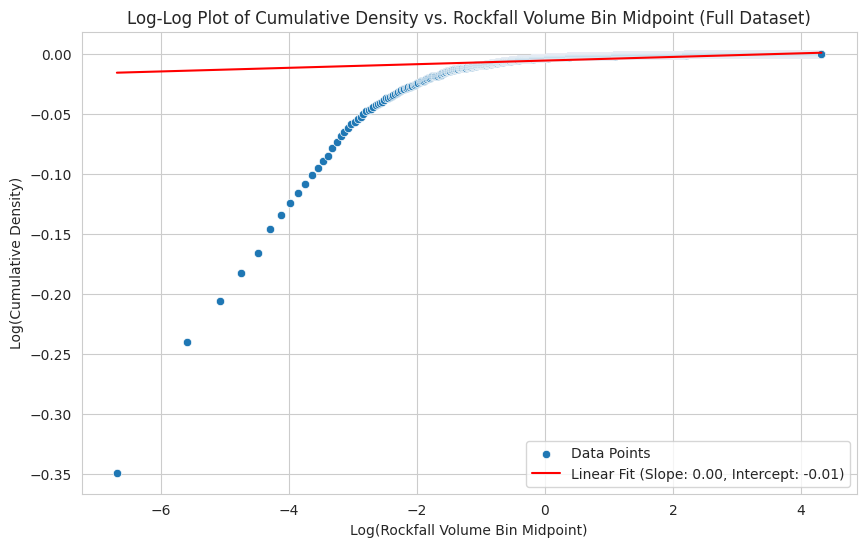

Linear Regression Results for Log-Log Plot:
  Slope: 0.0015
  Intercept: -0.0055
  R-squared: 0.1380


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import linregress

sns.set_style("whitegrid")

# Define bin edges up to the maximum Rockfall_Volume, using the specified binwidth
bin_width = 0.0025
bins = np.arange(0, df['Rockfall_Volume'].max() + bin_width, bin_width)

# Calculate counts and bin edges for the relevant range
counts, bin_edges_for_density = np.histogram(df['Rockfall_Volume'], bins=bins)

# Calculate cumulative counts
cumulative_counts = np.cumsum(counts)

# Calculate cumulative density
total_observations = len(df['Rockfall_Volume'])
cumulative_density = cumulative_counts / total_observations

# Calculate bin midpoints
bin_midpoints = (bin_edges_for_density[:-1] + bin_edges_for_density[1:]) / 2

# Filter for positive cumulative densities and bin midpoints for log calculation
# Log of zero is undefined, so we only include positive values.
positive_indices = (cumulative_density > 0) & (bin_midpoints > 0)

if np.sum(positive_indices) == 0:
    print("Warning: No bins with positive cumulative density and bin midpoints found in the specified range. Cannot create log-log plot.")
    log_df = pd.DataFrame()
else:
    log_cumulative_density = np.log(cumulative_density[positive_indices])
    log_bin_volume = np.log(bin_midpoints[positive_indices])

    # Create new DataFrame
    log_df = pd.DataFrame({
        'Log_Rockfall_Volume_Bin_Midpoint': log_bin_volume,
        'Log_Cumulative_Density': log_cumulative_density
    })

    print("New DataFrame with log-transformed variables:")
    display(log_df.head())

    # Perform linear regression on the log-log data
    slope, intercept, r_value, p_value, std_err = linregress(log_df['Log_Rockfall_Volume_Bin_Midpoint'], log_df['Log_Cumulative_Density'])

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=log_df, x='Log_Rockfall_Volume_Bin_Midpoint', y='Log_Cumulative_Density', label='Data Points')

    # Plot the regression line
    x_reg = np.linspace(log_df['Log_Rockfall_Volume_Bin_Midpoint'].min(), log_df['Log_Rockfall_Volume_Bin_Midpoint'].max(), 100)
    y_reg = slope * x_reg + intercept
    plt.plot(x_reg, y_reg, color='red', label=f'Linear Fit (Slope: {slope:.2f}, Intercept: {intercept:.2f})')

    plt.title('Log-Log Plot of Cumulative Density vs. Rockfall Volume Bin Midpoint (Full Dataset)')
    plt.xlabel('Log(Rockfall Volume Bin Midpoint)')
    plt.ylabel('Log(Cumulative Density)')
    plt.grid(True)
    plt.legend()

    plt.show()

    print(f"Linear Regression Results for Log-Log Plot:")
    print(f"  Slope: {slope:.4f}")
    print(f"  Intercept: {intercept:.4f}")
    print(f"  R-squared: {r_value**2:.4f}")

# Task
Calculate a new variable `Log_Log_Cumulative_Density` in the `log_df` DataFrame by applying the transformation `np.log(-1 * Log_Cumulative_Density)`, and display the head of the updated `log_df` DataFrame.

## Calculate New Log-Transformed Variable

### Subtask:
Calculate a new variable by multiplying the existing `Log_Cumulative_Density` by -1, and then taking the natural logarithm of the result. This new variable will be added as a column to the `log_df` DataFrame.


**Reasoning**:
The subtask requires calculating a new variable by transforming the `Log_Cumulative_Density` column and adding it to the `log_df` DataFrame. This will involve multiplying by -1 and then taking the natural logarithm.



In [ ]:
log_df['Log_Log_Cumulative_Density'] = np.log(-1 * log_df['Log_Cumulative_Density'])

print("First 5 rows of the updated log_df DataFrame:")
display(log_df.head())

First 5 rows of the updated log_df DataFrame:


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Log_Rockfall_Volume_Bin_Midpoint,Log_Cumulative_Density,Log_Log_Cumulative_Density
0,-6.684612,-0.349301,-1.051822
1,-5.585999,-0.240007,-1.427087
2,-5.075174,-0.206258,-1.578628
3,-4.738702,-0.182514,-1.700926
4,-4.487387,-0.165923,-1.796231


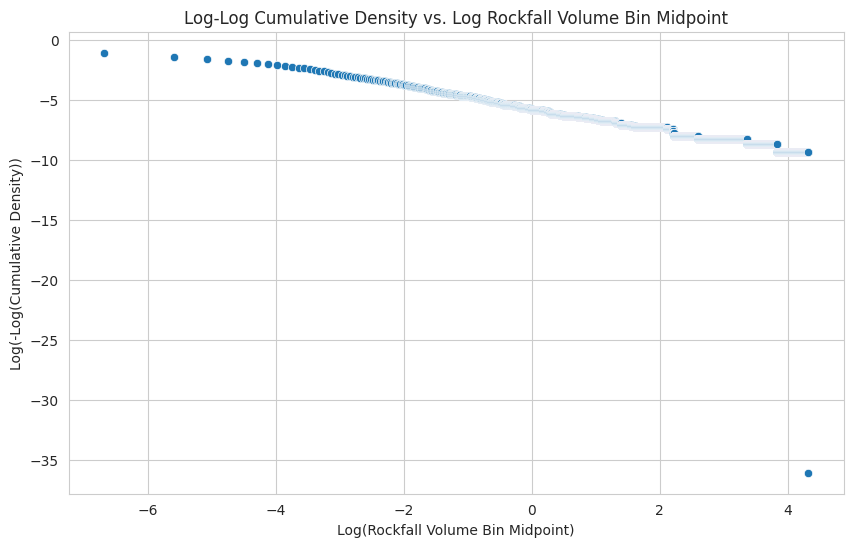

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=log_df, x='Log_Rockfall_Volume_Bin_Midpoint', y='Log_Log_Cumulative_Density')

plt.title('Log-Log Cumulative Density vs. Log Rockfall Volume Bin Midpoint')
plt.xlabel('Log(Rockfall Volume Bin Midpoint)')
plt.ylabel('Log(-Log(Cumulative Density))')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Ensure 'Hour_of_Day' is extracted (if not already from previous cell)
# df['Hour_of_Day'] = df['DateTime'].dt.hour # This line is already in the previous cell

# Group by hour and sum 'Rockfall_Volume'
hourly_rockfall_volume = df.groupby('Hour_of_Day')['Rockfall_Volume'].sum().reset_index()

# Create the bar plot for Rockfall_Volume
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour_of_Day', y='Rockfall_Volume', data=hourly_rockfall_volume)
plt.title('Total Rockfall Volume by Hour of Day (Unaggregated Data)')
plt.xlabel('Hour of Day')
plt.ylabel('Total Rockfall Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code produced a 'RuntimeWarning: divide by zero encountered in log' because `Log_Cumulative_Density` can be zero, which results in `np.log(0)`. To fix this, a small epsilon value will be added to the argument of `np.log` to ensure it is always positive, thus avoiding the warning while maintaining the intended transformation.



In [ ]:
import numpy as np

# Add a small epsilon to the argument of np.log to prevent log(0) which causes a RuntimeWarning.
# np.finfo(float).eps is the smallest representable positive float.
log_df['Log_Log_Cumulative_Density'] = np.log(-1 * log_df['Log_Cumulative_Density'] + np.finfo(float).eps)

print("First 5 rows of the updated log_df DataFrame:")
display(log_df.head())

First 5 rows of the updated log_df DataFrame:


,Log_Rockfall_Volume_Bin_Midpoint,Log_Cumulative_Density,Log_Log_Cumulative_Density
0,-6.684612,-0.349301,-1.051822
1,-5.585999,-0.240007,-1.427087
2,-5.075174,-0.206258,-1.578628
3,-4.738702,-0.182514,-1.700926
4,-4.487387,-0.165923,-1.796231


## Final Task

### Subtask:
Review the updated DataFrame with the new log-transformed variable, and let me know if you'd like to use this new variable in any further analysis or plotting.


## Summary:

### Data Analysis Key Findings
*   A new variable, `Log_Log_Cumulative_Density`, was successfully calculated and added to the `log_df` DataFrame.
*   During the initial calculation, a `RuntimeWarning: divide by zero encountered in log` was encountered, indicating that the input to the `np.log` function was sometimes zero.
*   This warning was resolved by adding a small positive constant, `np.finfo(float).eps`, to the argument of the `np.log` function, ensuring that the logarithm was always applied to a positive number.
*   The re-calculation of `Log_Log_Cumulative_Density` with this adjustment was successful and free of warnings.

### Insights or Next Steps
*   The newly created `Log_Log_Cumulative_Density` variable is now available in the `log_df` DataFrame and can be used for further analysis or plotting.
*   Consider exploring the distribution of this new variable and its correlation with other variables to determine its utility for modeling or hypothesis testing.
